# Reconocimiento de patrones: Clasificación
### Ramón Soto C. [(rsotoc@moviquest.com)](mailto:rsotoc@moviquest.com/)
![ ](images/blank.png)
![agents](images/binary_data_under_a_magnifying.jpg)
[ver en nbviewer](http://nbviewer.ipython.org/github/rsotoc/pattern-recognition/blob/master/Clasificación%20I.ipynb) 

## Definición

Se entiende por **clasificación** el proceso de identificar a qué conjunto de categorías o *clases* pertenece una nueva observación, <u>usualmente</u> sobre la base de un conjunto de elementos cuya pertenencia a una categoría ya es conocida.

![ ](images/classification_sorting.png)

El *clustering* se socia con el *aprendizaje no supervisado* y la *clasificación* con el *aprendizaje supervisado*.

Entre los métodos más populares de clasificación se encuentran los siguientes:

* El método de $k$-vecinos próximos

* El clasificador ingenuo de Bayes

* Los árboles de decisión

* Las máquinas de soporte vectorial

* Las redes neuronales



## Técnicas de clasificación: El método de $k$-vecinos próximos

El método de **$k$-vecinos próximos** (o simplement kNN) es un método de *aprendizaje vago* (*lazy learning*). Esto significa que el aprendizaje no conduce a una generalización: no existe una fase de entrenamiento (o es muy breve) y en su lugar el método mantiene todos los datos disponibles y los emplea para realizar la clasificación. 

kNN es un método de aprendizaje *no paramétrico*, es decir, no asume una distribución específica de los datos; en particular, no requiere distribuciones *bien comportadas* (que sigan una distribución normal o que sean separables linealmente, por ejemplo).

kNN puede emplearse para clasificación o para regresión. Este último caso se analizará en una lección posterior.


### Algoritmo

El algoritmo kNN es muy intuitivo: Asumimos que tenemos un conjunto de vectores previamente clasificados y que debemos clasificar un nuevo vector. 

![ ](images/knn1.png)

El proceso consiste en buscar los $k$ vectores ya clasificados que sean más cercanos al nuevo vector; la clase del nuevo vector se determina mediante un proceso de votación: el vector es asignado a aquella clase que tenga más representantes dentro de los $k$ vecinos.

In [1]:
# Inicializar el ambiente
import numpy as np
import pandas as pd
import math
import random
import time
import os
import sys
from scipy.spatial import distance
from sklearn import cluster
from matplotlib import pyplot as plt
%matplotlib inline
np.set_printoptions(precision=2, suppress=True) # Cortar la impresión de decimales a 1

os.chdir('Data sets')

Datos de entrenaiento: 
[[  70.28   42.12]
 [   0.     56.75]
 [  79.      2.5 ]
 [  75.64   11.67]
 [  82.     58.8 ]
 [  86.     77.27]
 [  80.     85.5 ]
 [  68.2    62.44]
 [  72.     88.  ]
 [  74.     80.6 ]
 [  91.72    0.  ]
 [  77.69   13.17]
 [  79.8    71.2 ]
 [  87.1    75.39]
 [   0.     80.85]
 [   0.     59.93]
 [  96.      5.  ]
 [  86.     89.58]
 [   0.     76.25]
 [   0.     90.62]
 [ 100.     95.06]
 [  87.     62.56]
 [  79.     82.46]
 [   0.     75.92]
 [   0.     76.88]
 [  73.46   83.53]
 [  92.     87.56]
 [  77.     84.38]
 [  70.8    35.  ]
 [  92.6    66.88]]

Dato de prueba:
[72, 52]

Prototipos de clase (centroides):
 [[ 80.16  15.64]
 [ 82.26  78.2 ]
 [  0.    73.89]]


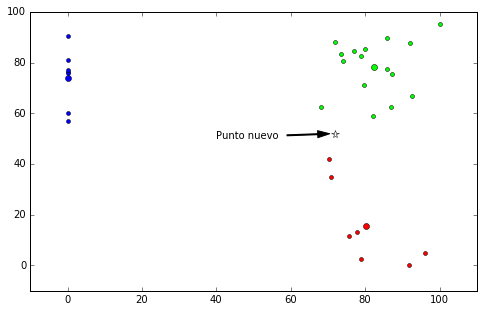

In [2]:
# Leer los datos de archivo, separar training y test y calcular "prototipos de clase"
train_set = pd.read_csv("datosProm.csv", names = ['A', 'B']).values
test_point = [72, 52]
print("Datos de entrenaiento: \n{}\n\nDato de prueba:\n{}\n".format(train_set, test_point))

from sklearn import cluster
from matplotlib import pyplot as plt
%matplotlib inline

num_clusters = 3
k_means = cluster.KMeans(n_clusters=num_clusters, init='random')
k_means.fit(train_set) 
print("Prototipos de clase (centroides):\n", k_means.cluster_centers_)

fig = plt.figure(figsize=(8, 5))
colors = ['#ff0000', '#00ff00', '#0000ff']
for k in range(num_clusters):
    my_members = k_means.labels_ == k
    plt.plot(train_set[my_members, 0], train_set[my_members, 1], 'o', 
             markeredgecolor='k', markerfacecolor=colors[k], markersize=4)
    plt.plot(k_means.cluster_centers_[k][0], k_means.cluster_centers_[k][1], 'o', 
             markeredgecolor='k', markerfacecolor=colors[k], markersize=6)
plt.annotate('Punto nuevo', xy=(test_point[0], test_point[1]), xytext=(40, 50),
            arrowprops=dict(facecolor='black', shrink=0.1, width=1, headwidth=7))
plt.plot(test_point[0], test_point[1], 'w', marker='*', markersize=8)
plt.xlim([-10,110])
plt.ylim([-10,100])
plt.show()

### Casos según $k$

Existen dos casos generales de implementación del método kNN:
#### <big>I</big>. $k=1$ o **Regla del vecino más cercano**. 
El escenario es muy simple: Buscar el vector de *entrenamiento* $x$ cuya similaridad al vector de entrada $y$ sea mayor (o cuya distancia a $y$ sea menor): 

In [3]:
LARGER_DISTANCE = sys.maxsize

k_neighs = 5 # 5 vecinos... aunque tomaremos sólo el más cercano
neighbors_dists = [LARGER_DISTANCE] * k_neighs
neighbors = [0] * k_neighs
for i in range(len(train_set)):
    dist = distance.euclidean(train_set[i], test_point)
    for k in range(k_neighs):
        if (dist < neighbors_dists[k]) :
            for j in range(k_neighs-1, k, -1):
                neighbors_dists[j] = neighbors_dists[j-1]
                neighbors[j] = neighbors[j-1] 
            neighbors_dists[k] = dist
            neighbors[k] = i
            break
            
print("Los {} vecinos más próximos son:".format(k_neighs))
for k in range(k_neighs):
    clase = k_means.labels_[neighbors[k]]
    print("Vecino {}: {}, dist={}, clase={}, centroide={}"
          .format(k, neighbors[k], neighbors_dists[k], 
                  clase, k_means.cluster_centers_[clase]))
print("\nEl nuevo punto es asignado a la clase", k_means.labels_[neighbors[0]])

Los 5 vecinos más próximos son:
Vecino 0: 0, dist=10.023673228911644, clase=0, centroide=[ 80.16  15.64]
Vecino 1: 7, dist=11.11006750654558, clase=1, centroide=[ 82.26  78.2 ]
Vecino 2: 4, dist=12.092973166264777, clase=1, centroide=[ 82.26  78.2 ]
Vecino 3: 28, dist=17.04230031421815, clase=0, centroide=[ 80.16  15.64]
Vecino 4: 21, dist=18.342004688692022, clase=1, centroide=[ 82.26  78.2 ]

El nuevo punto es asignado a la clase 0


Este enfoque es demasido simple y suele arrojar malos resultados... a no ser que:

0) Que las clases estén muy bien diferenciadas :-S

1) El número de ejemplos sea muy grande. En tal caso, es muy probable que para cada nuevo observación haya un elemento en el conjunto de entrenamiento que sea casi idéntico a la nueva obervación.

2) Que el vecino más próximo se tome con respecto a los prototipos!... 

In [4]:
for i in range(num_clusters):
    dist = distance.euclidean(k_means.cluster_centers_[i], test_point)
    print ("Distancia del punto de prueba al prototipo de la clase {}: {}".format(i, dist))

Distancia del punto de prueba al prototipo de la clase 0: 37.267635896666846
Distancia del punto de prueba al prototipo de la clase 1: 28.1375318758149
Distancia del punto de prueba al prototipo de la clase 2: 75.25305315333033


#### <big>II.</big> $k = K$ ó **Regla de los k-vecinos próximos**. 

En este caso, se seleccionan los $k$ vectores de entrenamiento más cercanos a la nueva observación. La nueva clase es seleccionada mediante un proceso de *votación*. Existen diversas formas de realizar la votación, ya sea un simple conteo de vecinos en cada caso o diversas formas de votación ponderada.

In [5]:
simple_vote = [0] * num_clusters
winner = 0 
for k in range(k_neighs):
    clase = k_means.labels_[neighbors[k]]
    simple_vote[clase] += 1
for k in range(num_clusters):
    if (simple_vote[k] == max(simple_vote)):
        winner = k
print("Votación simple:\nEl nuevo punto es asignado a la clase {} con {} vecinos cercanos.\n"
      .format(winner, simple_vote[winner]))

print("Los {} vecinos más próximos y sus pesos ponderados son:".format(k_neighs))
suma_dists = sum(neighbors_dists)
neighbors_weights = [0] * k_neighs
weighted_vote = [0] * num_clusters
winner = 0 
for k in range(k_neighs):
    neighbors_weights[k] = 1 - neighbors_dists[k] / suma_dists
    clase = k_means.labels_[neighbors[k]]
    weighted_vote[clase] += neighbors_weights[k]
    print("Vecino {}: peso={}, clase: {}"
          .format(k, neighbors_weights[k], k_means.labels_[neighbors[k]]))
for k in range(num_clusters):
    if (simple_vote[k] == max(simple_vote)):
        winner = k
print("\nVotación ponderada:")
print("El nuevo punto es asignado a la clase {} con una votación de {}."
      .format(winner, weighted_vote[winner]))

Votación simple:
El nuevo punto es asignado a la clase 1 con 3 vecinos cercanos.

Los 5 vecinos más próximos y sus pesos ponderados son:
Vecino 0: peso=0.8539057808944022, clase: 0
Vecino 1: peso=0.8380716729773634, clase: 1
Vecino 2: peso=0.8237459032189313, clase: 1
Vecino 3: peso=0.7516098640379241, clase: 0
Vecino 4: peso=0.7326667788713791, clase: 1

Votación ponderada:
El nuevo punto es asignado a la clase 1 con una votación de 2.3944843550676738.


### Observaciones

* La elección del valor de $k$ es una decisión crítica en el método de $k$ vecinos próximos. Si se elige un valor muy pequeño, el resultado será muy vulnerable al ruido, si se toma un valor muy alto, además de hacer computacionalmente costoso el método se pierde el factor de cercanía. Una elección típica es tomar $k=\frac{1}{2}\sqrt{n}$, siendo $n$ el número de datos de entrenamiento.

* Se suele utilizar valores impares de $k$, especialmente cuando hay sólo 2 clases, para evitar empates.

<hr style="border-width: 3px;">

### Tarea 8

* Utilice el método de $k$ vecinos próximos para realizar la limpieza de datos en el Pima Indians Diabetes Dataset.

**Fecha de entrega**: Martes 4 de octubre.